<a href="https://colab.research.google.com/github/poojith18/Text_Summarization/blob/main/Text_Summarization_Luhn_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization - Luhn algorithm

- https://courses.ischool.berkeley.edu/i256/f06/papers/luhn58.pdf

# Preparing the environment

In [ ]:
import re
import nltk
import string
import heapq

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
original_text = """Artificial intelligence is human like intelligence machines. 
                   It is the study of intelligent artificial agents. 
                   Science and engineering to produce intelligent machines. 
                   Solve problems and have intelligence. 
                   Related to intelligent behavior machines. 
                   Developing of reasoning machines. 
                   Learn from mistakes and successes. 
                   Artificial intelligence is related to reasoning in everyday situations."""
original_text = re.sub(r'\s+', ' ', original_text)
original_text

'Artificial intelligence is human like intelligence machines. It is the study of intelligent artificial agents. Science and engineering to produce intelligent machines. Solve problems and have intelligence. Related to intelligent behavior machines. Developing of reasoning machines. Learn from mistakes and successes. Artificial intelligence is related to reasoning in everyday situations.'

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stopwords.append('explanation')

In [ ]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text

In [ ]:
formatted_text = preprocess(original_text)
formatted_text

'artificial intelligence human like intelligence machines study intelligent artificial agents science engineering produce intelligent machines solve problems intelligence related intelligent behavior machines developing reasoning machines learn mistakes successes artificial intelligence related reasoning everyday situations'

# Function to calculate sentences score

In [ ]:
def calculate_sentences_score(sentences, important_words, distance):
  scores = []
  sentence_index = 0

  for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:
    #print('------------')
    #print(sentence)

    word_index = []
    for word in important_words:
      #print(word)
      try:
        word_index.append(sentence.index(word))
      except ValueError:
        pass

    word_index.sort()
    #print(word_index)

    if len(word_index) == 0:
      continue

    # [0, 1, 5]
    groups_list = []
    group = [word_index[0]]
    i = 1 # 3
    while i < len(word_index): # 3
      # first execution: 1 - 0 = 1
      # second execution: 2 - 1 = 1
      if word_index[i] - word_index[i - 1] < distance:
        group.append(word_index[i])
        #print('group', group)
      else:
        groups_list.append(group[:])
        group = [word_index[i]]
        #print('group', group)
      i += 1
    groups_list.append(group)
    #print('all groups', groups_list)

    max_group_score = 0
    for g in groups_list:
      #print(g)
      important_words_in_group = len(g)
      total_words_in_group = g[-1] - g[0] + 1
      score = 1.0 * important_words_in_group**2 / total_words_in_group
      #print('group score', score)

      if score > max_group_score:
        max_group_score = score

    scores.append((max_group_score, sentence_index))
    sentence_index += 1

  #print('final scores', scores)
  return scores

In [ ]:
test = ['a', 'b', 'c']
test.index('a')

0

In [ ]:
test = [0,1,3,4,6,9]
test[-1], test[0] + 1

(9, 1)

In [ ]:
3*3

9

# Function to summarize the texts

In [ ]:
def summarize(text, top_n_words, distance, number_of_sentences, percentage = 0):
  original_sentences = [sentence for sentence in nltk.sent_tokenize(text)]
  #print(original_sentences)
  formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
  #print(formatted_sentences)
  words = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)]
  #print(words)
  frequency = nltk.FreqDist(words)
  #print(frequency)
  #return frequency
  top_n_words = [word[0] for word in frequency.most_common(top_n_words)]
  #print(top_n_words)
  sentences_score = calculate_sentences_score(formatted_sentences, top_n_words, distance)
  #print(sentences_score)
  if percentage > 0:
    best_sentences = heapq.nlargest(int(len(formatted_sentences) * percentage), sentences_score)
  else:  
    best_sentences = heapq.nlargest(number_of_sentences, sentences_score)
  #print(best_sentences)
  best_sentences = [original_sentences[i] for (score, i) in best_sentences]
  #print(best_sentences)
  return original_sentences, best_sentences, sentences_score

In [ ]:
original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 3)

In [ ]:
original_sentences

['Artificial intelligence is human like intelligence machines.',
 'It is the study of intelligent artificial agents.',
 'Science and engineering to produce intelligent machines.',
 'Solve problems and have intelligence.',
 'Related to intelligent behavior machines.',
 'Developing of reasoning machines.',
 'Learn from mistakes and successes.',
 'Artificial intelligence is related to reasoning in everyday situations.']

In [ ]:
best_sentences

['Learn from mistakes and successes.',
 'Related to intelligent behavior machines.',
 'Science and engineering to produce intelligent machines.']

In [ ]:
sentences_score

[(2.0, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (1.0, 5), (3.0, 6)]

In [ ]:
from IPython.core.display import HTML

In [ ]:
def visualize(title, sentence_list, best_sentences):
  from IPython.core.display import HTML
  text = ''

  display(HTML(f'<h1>Summary - {title}</h1>'))
  for sentence in sentence_list:
    if sentence in best_sentences:
      text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += ' ' + sentence
  display(HTML(f""" {text} """))

# Extracting texts from the Internet

In [ ]:
!pip install goose3

In [ ]:
from goose3 import Goose

In [ ]:
g = Goose()
url = 'https://en.wikipedia.org/wiki/Automatic_summarization'
article = g.extract(url)

In [ ]:
article.cleaned_text

'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.\n\nIn addition to text, images and videos can also be summarized. Text summarization finds the most informative sentences in a document;[1] image summarization finds the most representative images within an image collection[citation needed]; video summarization extracts the most important frames from the video content.[2]\n\nThere are two general approaches to automatic summarization: extraction and abstraction.\n\nHere, content is extracted from the original data, but the extracted content is not modified in any way. Examples of extracted content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that collectively comprise an abstract, and representative images or video segments, as stated above. For text, extraction is analog

In [ ]:
original_sentences, best_sentences, score_sentences = summarize(article.cleaned_text, 300, 10, 120)

In [ ]:
len(original_sentences)

296

In [ ]:
(120 / len(original_sentences)) * 100

40.54054054054054

In [ ]:
original_sentences

['Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.',
 'In addition to text, images and videos can also be summarized.',
 'Text summarization finds the most informative sentences in a document;[1] image summarization finds the most representative images within an image collection[citation needed]; video summarization extracts the most important frames from the video content.',
 '[2]\n\nThere are two general approaches to automatic summarization: extraction and abstraction.',
 'Here, content is extracted from the original data, but the extracted content is not modified in any way.',
 'Examples of extracted content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that collectively comprise an abstract, and representative images or video segments, as stated above.',
 'For text, 

In [ ]:
best_sentences

['For example, if we rank unigrams and find that "advanced", "natural", "language", and "processing" all get high ranks, then we would look at the original text and see that these words appear consecutively and create a final keyphrase using all four together.',
 'The two methods were developed by different groups at the same time, and LexRank simply focused on summarization, but could just as easily be used for keyphrase extraction or any other NLP ranking task.',
 'Some techniques and algorithms which naturally model summarization problems are TextRank and PageRank, Submodular set function, Determinantal point process, maximal marginal relevance (MMR) etc.',
 'Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic).',
 'Features might include the position in the document (i.e., the first few sentences are probably important), the number of words in th

In [ ]:
score_sentences

[(9.941176470588236, 0),
 (4.0, 1),
 (7.041666666666667, 2),
 (7.0, 3),
 (3.125, 4),
 (10.227272727272727, 5),
 (4.0, 6),
 (5.444444444444445, 7),
 (1.3333333333333333, 8),
 (8.066666666666666, 9),
 (4.923076923076923, 10),
 (8.909090909090908, 11),
 (7.363636363636363, 12),
 (1.7777777777777777, 13),
 (2.5714285714285716, 14),
 (4.571428571428571, 15),
 (4.166666666666667, 16),
 (7.117647058823529, 17),
 (4.9, 18),
 (8.333333333333334, 19),
 (8.1, 20),
 (13.235294117647058, 21),
 (4.0, 22),
 (5.0, 23),
 (6.666666666666667, 24),
 (7.0, 25),
 (5.0, 26),
 (7.363636363636363, 27),
 (5.444444444444445, 28),
 (4.5, 29),
 (6.125, 30),
 (9.6, 31),
 (2.0, 32),
 (5.444444444444445, 33),
 (6.125, 34),
 (13.473684210526315, 35),
 (2.0, 36),
 (4.266666666666667, 37),
 (4.923076923076923, 38),
 (9.307692307692308, 39),
 (4.481481481481482, 40),
 (1.0, 41),
 (8.45, 42),
 (2.7777777777777777, 43),
 (3.0, 44),
 (6.2592592592592595, 45),
 (6.75, 46),
 (6.75, 47),
 (8.066666666666666, 48),
 (5.142857142

In [ ]:
visualize(article.title, original_sentences,  best_sentences)

# Extracting articles from RSS feeds

- AI feeds: https://blog.feedspot.com/ai_rss_feeds/

In [ ]:
!pip install feedparser

In [ ]:
import feedparser

In [ ]:
from bs4 import BeautifulSoup
import os
import json

In [ ]:
url = 'https://www.aitrends.com/feed/'
feed = feedparser.parse(url)

In [ ]:
feed.entries

[{'author': 'Allison Proffitt',
  'author_detail': {'name': 'Allison Proffitt'},
  'authors': [{'name': 'Allison Proffitt'}],
  'content': [{'base': 'https://www.aitrends.com/feed/',
    'language': None,
    'type': 'text/html',
    'value': '<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/05/5-14PredictiveMaintenance-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span>\xa0</span></p>\n<p><span>Predictive maintenance (</span><span>PdM</span><span>)\xa0has emerged as a killer AI app.</span><span>\xa0</span></p>\n<p><span>In the past five years, predictive maintenance has moved from a niche use case to a fast-growing, high return on investment (ROI) application that is delivering true value to users.</span><span>\xa0</span><span>These developments are an indication of the power of the Internet of Things (IoT) and AI together, a mark

In [ ]:
for e in feed.entries:
  print(e.title)
  print(e.content[0].value)
  print('-------')

Predictive Maintenance is a Killer AI App
<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/05/5-14PredictiveMaintenance-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span> </span></p>
<p><span>Predictive maintenance (</span><span>PdM</span><span>) has emerged as a killer AI app.</span><span> </span></p>
<p><span>In the past five years, predictive maintenance has moved from a niche use case to a fast-growing, high return on investment (ROI) application that is delivering true value to users.</span><span> </span><span>These developments are an indication of the power of the Internet of Things (IoT) and AI together, a market considered in its infancy today.</span><span> </span></p>
<p><span>These observations are from research conducted by IoT Analytics, consultants who supply market intelligence, which recently estimated that the $6.

In [ ]:
def clean_html(text):
  if text == '':
    return ''
  else:
    return BeautifulSoup(text, 'html5lib').get_text()

In [ ]:
e.content[0].value

'<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/05/5-7AerialView-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By Lance Eliot, the AI Trends Insider</span></i><span>\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>When driving a car, you could really benefit from having a bird’s-eye view of the driving scene.\xa0</span><span>Let’s explore why.\xa0</span><span>\xa0</span></p>\n<p><span>Imagine that you are driving in a crowded and altogether hectic downtown area.\xa0</span><span>There are humongous skyscraper buildings that are towering over you and ostensibly blocking any chance of seeing beyond an extremely narrow tunnel-vision perspective of the roadway. Among the visual obscurity, you cannot see anything on the streets that intersect with the road that you are currently driving on. Until you get directly into an intersection, you pretty much have no idea what is 

In [ ]:
clean_html(e.content[0].value)

'By Lance Eliot, the AI Trends Insider\xa0\xa0\xa0\nWhen driving a car, you could really benefit from having a bird’s-eye view of the driving scene.\xa0Let’s explore why.\xa0\xa0\nImagine that you are driving in a crowded and altogether hectic downtown area.\xa0There are humongous skyscraper buildings that are towering over you and ostensibly blocking any chance of seeing beyond an extremely narrow tunnel-vision perspective of the roadway. Among the visual obscurity, you cannot see anything on the streets that intersect with the road that you are currently driving on. Until you get directly into an intersection, you pretty much have no idea what is taking place on any of those perpendicular avenues that are to the left and right of you.\xa0\xa0\xa0\nYou come to a corner that is packed with pedestrians and signposts, once again blocking your view, and decide to engage a rapid and sharp right turn. Just as you poke forward into the turn, you’ll have a very brief chance to glimpse whateve

In [ ]:
articles = []
for e in feed.entries:
  articles.append({'title': e.title, 'content': clean_html(e.content[0].value)})

In [ ]:
articles

[{'content': 'By John P. Desmond, AI Trends Editor\xa0\nPredictive maintenance (PdM)\xa0has emerged as a killer AI app.\xa0\nIn the past five years, predictive maintenance has moved from a niche use case to a fast-growing, high return on investment (ROI) application that is delivering true value to users.\xa0These developments are an indication of the power of the Internet of Things (IoT) and AI together, a market considered in its infancy today.\xa0\nThese observations are from research conducted by IoT Analytics, consultants who supply market intelligence, which recently estimated that the $6.9 billion predictive maintenance market will reach $28.2 billion by 2026.\xa0\xa0\nThe company began its research coverage of the IoT-driven predictive maintenance market in 2016, at an industry maintenance conference in Dortmund, Germany. Not much was happening. “We were bitterly disappointed,” stated Knud Lasse Lueth, CEO at IoT Analytics, in an account in\xa0IoT Business News. “Not a single e

In [ ]:
save_file = os.path.join('feed.json')
feed = open(save_file, 'w+')
feed.write(json.dumps(articles, indent=1))
feed.close()

In [ ]:
blog_articles = json.loads(open('feed.json').read())
blog_articles

[{'content': 'By John P. Desmond, AI Trends Editor\xa0\nPredictive maintenance (PdM)\xa0has emerged as a killer AI app.\xa0\nIn the past five years, predictive maintenance has moved from a niche use case to a fast-growing, high return on investment (ROI) application that is delivering true value to users.\xa0These developments are an indication of the power of the Internet of Things (IoT) and AI together, a market considered in its infancy today.\xa0\nThese observations are from research conducted by IoT Analytics, consultants who supply market intelligence, which recently estimated that the $6.9 billion predictive maintenance market will reach $28.2 billion by 2026.\xa0\xa0\nThe company began its research coverage of the IoT-driven predictive maintenance market in 2016, at an industry maintenance conference in Dortmund, Germany. Not much was happening. “We were bitterly disappointed,” stated Knud Lasse Lueth, CEO at IoT Analytics, in an account in\xa0IoT Business News. “Not a single e

# Word cloud

In [ ]:
feed_content = ''
for article in blog_articles:
  feed_content += article['content']

In [ ]:
feed_content

'By John P. Desmond, AI Trends Editor\xa0\nPredictive maintenance (PdM)\xa0has emerged as a killer AI app.\xa0\nIn the past five years, predictive maintenance has moved from a niche use case to a fast-growing, high return on investment (ROI) application that is delivering true value to users.\xa0These developments are an indication of the power of the Internet of Things (IoT) and AI together, a market considered in its infancy today.\xa0\nThese observations are from research conducted by IoT Analytics, consultants who supply market intelligence, which recently estimated that the $6.9 billion predictive maintenance market will reach $28.2 billion by 2026.\xa0\xa0\nThe company began its research coverage of the IoT-driven predictive maintenance market in 2016, at an industry maintenance conference in Dortmund, Germany. Not much was happening. “We were bitterly disappointed,” stated Knud Lasse Lueth, CEO at IoT Analytics, in an account in\xa0IoT Business News. “Not a single exhibitor was 

In [ ]:
formatted_feed_content = preprocess(feed_content)
formatted_feed_content

'john p. desmond ai trends editor predictive maintenance pdm emerged killer ai app past five years predictive maintenance moved niche use case fast-growing high return investment roi application delivering true value users developments indication power internet things iot ai together market considered infancy today observations research conducted iot analytics consultants supply market intelligence recently estimated 6.9 billion predictive maintenance market reach 28.2 billion 2026. company began research coverage iot-driven predictive maintenance market 2016 industry maintenance conference dortmund germany much happening “ bitterly disappointed ” stated knud lasse lueth ceo iot analytics account iot business news “ single exhibitor talking predictive maintenance. ” things changed iot analytics analyst fernando alberto brügge stated “ research 2021 shows predictive maintenance clearly evolved rather static condition-monitoring approach become viable iot application delivering overwhelm

In [ ]:
len(feed_content), len(formatted_feed_content)

(109905, 77613)

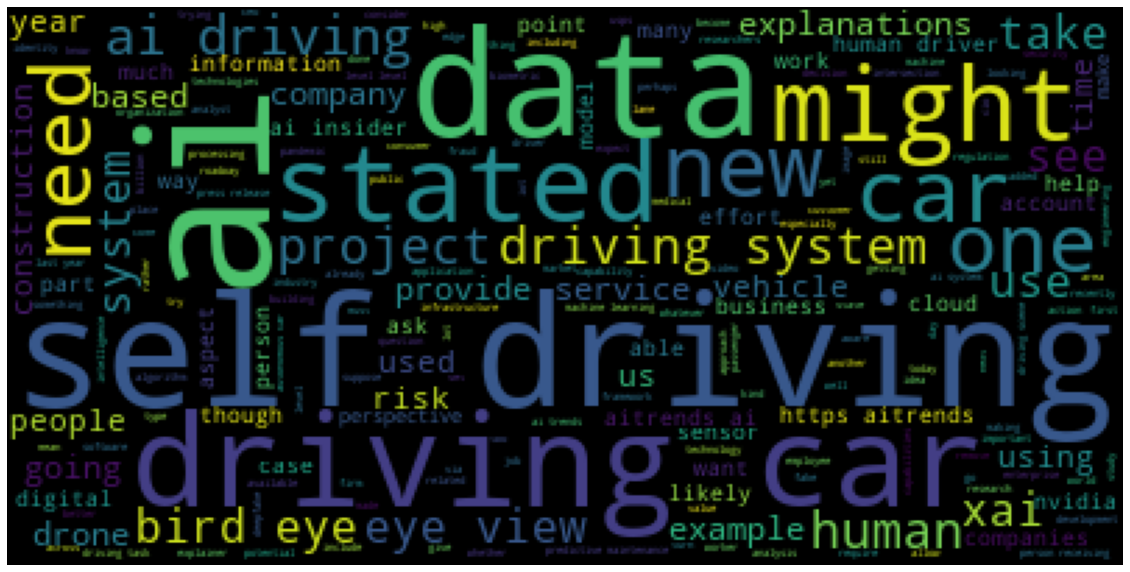

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(formatted_feed_content));

# Extracting named entities

- Acronyms: https://spacy.io/api/annotation#named-entities

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en')
nlp

In [ ]:
document = nlp(formatted_feed_content)

In [ ]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

In [ ]:
for entity in document.ents:
  if entity.label_ == 'GPE':
    print(entity.text, entity.label_)

germany GPE
italy GPE
trenitalia GPE
de meo GPE
us GPE
bnh.ai boutique GPE
virginia GPE
china GPE
china GPE
london GPE
china GPE
china GPE
breton GPE
london GPE
new york GPE
beijing GPE
uk GPE
canada GPE
india GPE
canada GPE
toronto GPE
vancouver GPE
ottawa GPE
toronto GPE
pennsylvania GPE
us GPE
america GPE
nvidia GPE
vmware GPE
san francisco GPE
san francisco GPE
us GPE
calif GPE
united states GPE
miami beach GPE
miami beach GPE
miami-dade county GPE
us GPE


# Summarizing the articles

In [ ]:
for article in blog_articles:
  #print(article)
  original_sentences, best_sentences, _ = summarize(article['content'], 150, 10, number_of_sentences=5, percentage=0.5)
  visualize(article['title'], original_sentences, best_sentences)
  save_summary(article['title'], original_sentences, best_sentences)

# Saving the summary

In [ ]:
def save_summary(title, original_sentences, best_sentences):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html>"""
  text = ''
  for sentence in original_sentences:
    if sentence in best_sentences:
      text += str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += sentence
  
  save_file = open(os.path.join(title + '.html'), 'wb')
  html_file = HTML_TEMPLATE.format(title, text)
  save_file.write(html_file.encode('utf-8'))
  save_file.close()